170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 212s 299ms/step - accuracy: 0.2837 - loss: 1.9319 - val_accuracy: 0.5424 - val_loss: 1.2804
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 262s 298ms/step - accuracy: 0.5163 - loss: 1.3461 - val_accuracy: 0.6186 - val_loss: 1.0857
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 214s 304ms/step - accuracy: 0.5851 - loss: 1.1624 - val_accuracy: 0.6710 - val_loss: 0.9498
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 261s 302ms/step - accuracy: 0.6395 - loss: 1.0162 - val_accuracy: 0.7072 - val_loss: 0.8363
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 261s 300ms/step - accuracy: 0.6699 - loss: 0.9313 - val_accuracy: 0.7174 - val_loss: 0.8102
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 209s 297ms/step - accuracy: 0.7032 - loss: 0.8459 - val_accuracy: 0.7464 - val_loss: 0.7345
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 258s 291ms/step - accuracy: 0.7139 - loss: 0.8062 - val_accuracy: 0.7500 - val_loss: 0.7338
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 265s 295ms/step - accuracy: 0.7357 -

Saving cat 1.jpeg to cat 1.jpeg


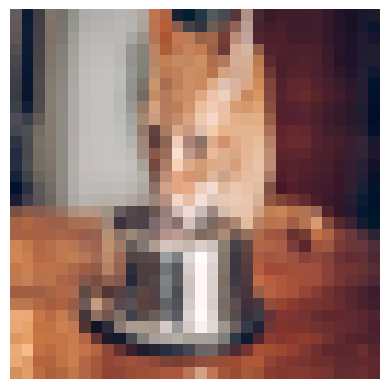

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Predicted class: cat (56.97% confidence)


In [ ]:
# ====== Install dependencies if needed ======
# !pip install tensorflow pillow matplotlib

# ====== Import ======
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# ====== Load CIFAR-10 ======
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# ====== Build Model ======
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  input_shape=(32, 32, 3), kernel_initializer='he_normal'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  kernel_initializer='he_normal'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# ====== Compile with SGD ======
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ====== Train ======
model.fit(x_train, y_train, epochs=20, batch_size=64,
          validation_split=0.1)

# ====== Evaluate ======
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# ====== Class names for CIFAR-10 ======
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# ====== Upload and Predict ======
uploaded = files.upload()

for fn in uploaded.keys():
    # Load and display
    img = Image.open(fn).convert('RGB').resize((32, 32))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocess
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 32, 32, 3)

    # Predict
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    print(f"Predicted class: {predicted_class} ({confidence:.2f}% confidence)")
